## Question 1:

Attach the dataset and mentioned problem statement below,

● A sizable department has to be maintained, for the purposes of recruiting new talent
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.
● Also, they want to know which of these variables is most important and needs to be addressed

# Assignment 12

In [1]:
#Load Data Set using Pandas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv('general_data.csv') 
df.head() 
 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [34]:
#Cleaning Data set for null values

df.isnull() 

                      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#Cleaning Data set for Duplicate values
df.duplicated()
df.drop_duplicates() 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [45]:
#Univariate Analysis

df1=df[['Age','DistanceFromHome','Education','MonthlyIncome', 
        'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 
        'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]
df1.describe() 


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [46]:
df1.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [48]:
df1.mode()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [49]:
df1.var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [51]:
df1.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [62]:
df1.kurtosis()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1b57c0088>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1b45c2308>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1b49c1308>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1b4a75ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1b53c3908>],
 'means': []}

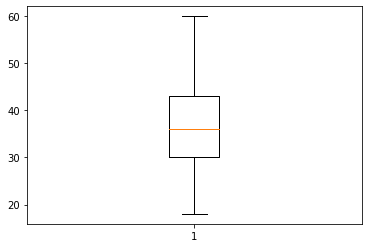

In [59]:
ageplot=df.Age

plt.boxplot(ageplot)



{'whiskers': [<matplotlib.lines.Line2D at 0x2b1b4483d88>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1b659a148>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1b4483e88>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1b51b4b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1b4008c88>],
 'means': []}

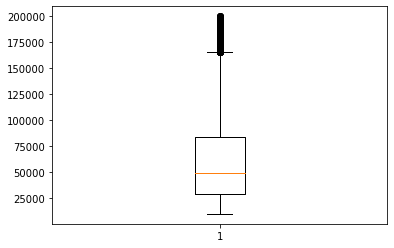

In [58]:
#There are no outliers in the DataFrame for Age as seen in the above graph 
#Age is normally distributed without any outliers as seen in above graph


miplot=df.MonthlyIncome

plt.boxplot(miplot)


{'whiskers': [<matplotlib.lines.Line2D at 0x2b1b6d45888>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1b5accd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1b5acc2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1b6642588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1b6642f88>],
 'means': []}

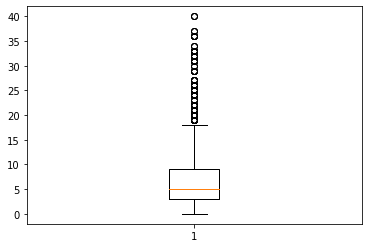

In [63]:
#Monthly Income is Right skewed with several outliers as seen in the above graph

yacplot=df.YearsAtCompany 

plt.boxplot(yacplot) 



{'whiskers': [<matplotlib.lines.Line2D at 0x2b1b6570648>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1b63dfc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1b6570708>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1b4a9bb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1b5734208>],
 'means': []}

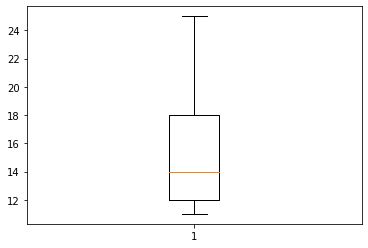

In [64]:
#Years at company is also Right Skewed with several outliers observed as seen in the above graph


psgplot=df.PercentSalaryHike 

plt.boxplot(psgplot) 

In [107]:
#There are no outliers in the DataFrame for PercentSalaryHike as seen in the above graph 
#PercentSalaryHike is Positive skewed since Mean is Greater than Meadian

from scipy.stats import mannwhitneyu

# dummies = pd.get_dummies(df['Attrition'])
# dummies.values[dummies != 0] = df['DistanceFromHome']
# dummies

# a1=dummies.Yes
# a2=dummies.No
# stat, p=mannwhitneyu(a1,a2)
# print(stat, p)

ned = df.columns

for n in ned:    
    if df[n].dtypes == "int64" or df[n].dtypes=="float64":
        dummies = pd.get_dummies(df['Attrition'])
        dummies.values[dummies != 0] = df[n]
        #dummies
        a1=dummies.Yes
        a2=dummies.No
        stat, p=mannwhitneyu(a1,a2)
        print(n," = ",stat, p)
        
        
        if p< 0.05:
            print(f"As the P value is {p}, which is < than 0.05, the H0 is rejected and ha is accepted.\n")
            print(f"H0: There is no significant differences in the {n} between attrition (Y) and attirition (N).\n")
            print(f"Ha: There is significant differences in the {n} between attrition (Y) and attirition (N)")
        else:
             print(f"As the P value is {p}, which is > than 0.05, the H0 is accepted  and ha is rejected.\n")
        

Age  =  2782246.5 0.0
As the P value is 0.0, which is < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Age between attrition (Y) and attirition (N).

Ha: There is significant differences in the Age between attrition (Y) and attirition (N)
DistanceFromHome  =  3132625.5 0.0
As the P value is 0.0, which is < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the DistanceFromHome between attrition (Y) and attirition (N).

Ha: There is significant differences in the DistanceFromHome between attrition (Y) and attirition (N)
Education  =  3100662.0 0.0
As the P value is 0.0, which is < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Education between attrition (Y) and attirition (N).

Ha: There is significant differences in the Education between attrition (Y) and attirition (N)
EmployeeCount  =  3135510.0 0.0
As the P value is 0.0, which is < than 0.

In [110]:
#Step 6
#Statistical Tests (Separate T Test)
from scipy.stats import ttest_ind

ned = df.columns

for n in ned:    
    if df[n].dtypes == "int64" or df[n].dtypes=="float64":
        dummies = pd.get_dummies(df['Attrition'])
        dummies.values[dummies != 0] = df[n]
        #dummies
        a1=dummies.Yes
        a2=dummies.No
        stat,  p=ttest_ind(a2,a1)
        print(n," = ",stat, p)

Age  =  84.04189203623591 0.0
DistanceFromHome  =  44.45445917636664 0.0
Education  =  72.33201840417362 0.0
EmployeeCount  =  86.50847948259513 0.0
EmployeeID  =  57.09464986419707 0.0
JobLevel  =  60.74345780543899 0.0
MonthlyIncome  =  58.5576402807523 0.0
NumCompaniesWorked  =  40.06994996140662 0.0
PercentSalaryHike  =  77.3926889242752 0.0
StandardHours  =  86.50847948259513 0.0
StockOptionLevel  =  38.08194572194879 6.394638217917278e-294
TotalWorkingYears  =  61.22502658136287 0.0
TrainingTimesLastYear  =  67.17682768327873 0.0
YearsAtCompany  =  51.45296941515692 0.0
YearsSinceLastPromotion  =  30.486566530561852 3.623710817685714e-194
YearsWithCurrManager  =  53.02424349024521 0.0


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome_Yes
Age,1.000000,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580,0.003181
DistanceFromHome,0.007376,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773,-0.411469
Education,-0.033900,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645,0.009258
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079,-0.005620
JobLevel,-0.001137,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898,0.013750
MonthlyIncome,-0.045163,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095,0.079399
NumCompaniesWorked,0.299527,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372,0.014602
PercentSalaryHike,-0.032561,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687,-0.019463
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


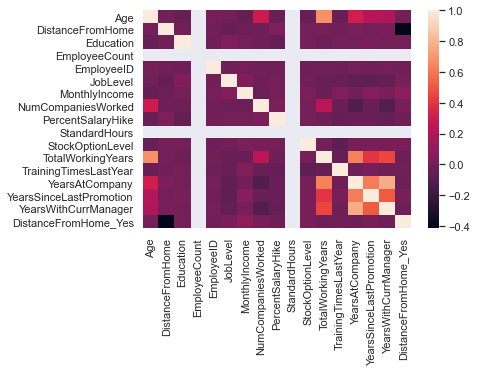

In [249]:
import seaborn as sns; sns.set()
#df.corr()
ax = sns.heatmap(df.corr())
df.corr()


In [253]:
from scipy.stats import pearsonr

dr = df
dr = pd.get_dummies(df["Attrition"], drop_first=True)
dr.rename(columns={"Yes": "Attrition"}, inplace =True)
ned = df.columns.drop(["EmployeeCount","StandardHours"])
column_1 = dr["Attrition"]

for n in ned:    
    if df[n].dtypes == "int64" or df[n].dtypes=="float64":
        column_2 = df[n]
        #correlation = column_1.corr(column_2)
        stats, p=pearsonr(column_1, column_2)
        #print(f"{n}===", stats, p)
        print('{:<23}{:>10f}{:>15f}'.format(n,stats,p))
       


Age                     -0.158399       0.000000
DistanceFromHome        -0.009449       0.531772
Education               -0.017106       0.257575
EmployeeID              -0.004621       0.759773
JobLevel                -0.012382       0.412549
MonthlyIncome           -0.030160       0.045891
NumCompaniesWorked       0.042831       0.004572
PercentSalaryHike        0.033153       0.028192
StockOptionLevel        -0.008164       0.589000
TotalWorkingYears       -0.169670       0.000000
TrainingTimesLastYear   -0.047586       0.001628
YearsAtCompany          -0.133003       0.000000
YearsSinceLastPromotion -0.031423       0.037523
YearsWithCurrManager    -0.154692       0.000000
